  **Data Augmentation To Address Overfitting In Flower Classification CNN**

---




**Import all library packages here as you need**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Load flowers dataset**

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/2950505226_529e013bf7_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/39271782_b4335d09ae_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2307673262_e1e1aefd29.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4341530649_c17bbc5d01.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3815322974_52c12dbde3.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14982802401_a3dfb22afb.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg')]

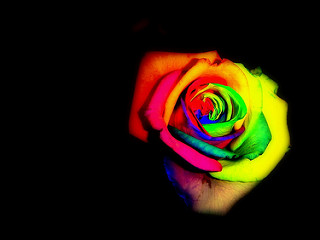

In [ ]:
PIL.Image.open(str(roses[25]))

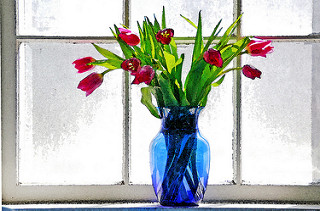

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[67]))

**Read flowers images from disk into numpy array using opencv**

In [ ]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulops/*'))
}

In [ ]:







flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14982802401_a3dfb22afb.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][5]))

In [ ]:
img.shape

(238, 320, 3)

In [ ]:
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [ ]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (170, 170))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)



**Preprocessing: scale images**

In [ ]:
xtrain_scaled = xtrain / 255
xtest_scaled = xtest / 255

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("vertical",
                                                 input_shape=(170,
                                                              170,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(170,
                                                              170,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(170,
                                                              170,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


**Build convolutional neural network and train it**

In [ ]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(xtrain_scaled, ytrain, epochs=30)

Epoch 1/30
68/68 [==============================] - 76s 1s/step - loss: 1.0308 - accuracy: 0.5597
Epoch 2/30
68/68 [==============================] - 69s 1s/step - loss: 0.7632 - accuracy: 0.6981
Epoch 3/30
68/68 [==============================] - 69s 1s/step - loss: 0.6016 - accuracy: 0.7659
Epoch 4/30
68/68 [==============================] - 71s 1s/step - loss: 0.4444 - accuracy: 0.8319
Epoch 5/30
68/68 [==============================] - 71s 1s/step - loss: 0.3419 - accuracy: 0.8760
Epoch 6/30
68/68 [==============================] - 69s 1s/step - loss: 0.2361 - accuracy: 0.9224
Epoch 7/30
68/68 [==============================] - 69s 1s/step - loss: 0.1338 - accuracy: 0.9610
Epoch 8/30
68/68 [==============================] - 71s 1s/step - loss: 0.0729 - accuracy: 0.9786
Epoch 9/30
68/68 [==============================] - 69s 1s/step - loss: 0.0403 - accuracy: 0.9898
Epoch 10/30
68/68 [==============================] - 69s 1s/step - loss: 0.0236 - accuracy: 0.9963
Epoch 11/30
68/68 [

In [ ]:
model.evaluate(xtest_scaled,ytest)

23/23 [==============================] - 9s 365ms/step - loss: 1.6301 - accuracy: 0.7591


[1.6301465034484863, 0.7590529322624207]

**Here we see that while train accuracy is very high (100%), the test accuracy is significantly low (75.90%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting.**

In [ ]:
predictions = model.predict(xtest_scaled)
predictions

23/23 [==============================] - 8s 347ms/step


array([[  4.4262824 ,  40.26132   ,   2.2887247 , -17.591984  ,
        -61.031235  ],
       [  9.816292  ,   5.4604187 ,  -0.12501842,  -1.087742  ,
        -24.643448  ],
       [ 11.412742  ,  -1.7483197 ,   8.4578085 ,  -9.934332  ,
        -21.792233  ],
       ...,
       [ -0.14165606,   3.6702003 ,   9.787741  ,  -8.492997  ,
        -18.448782  ],
       [  6.375197  ,   6.8035874 ,   1.2629807 ,  -3.914469  ,
        -21.83851   ],
       [ -0.40778482,   6.740104  ,   5.512336  ,  -5.237739  ,
        -24.804379  ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

1

In [ ]:
ytest[0]

1

**Improve Test Accuracy Using Data Augmentation**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(170, 170, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


**Original Image**

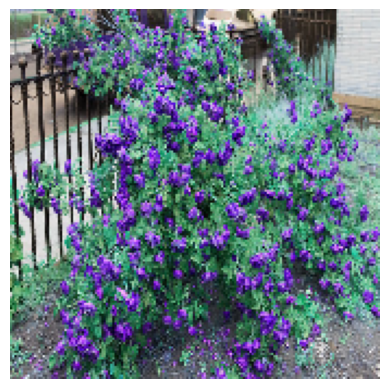

In [ ]:
plt.axis('off')
plt.imshow(x[0])

**Newly generated training sample using data augmentation**

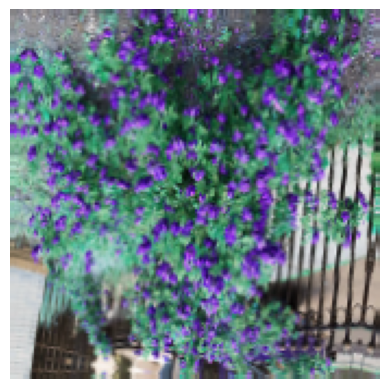

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

**Train the model using data augmentation and a drop out layer**

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(xtrain_scaled, ytrain, epochs=30)

Epoch 1/30
68/68 [==============================] - 93s 1s/step - loss: 1.3712 - accuracy: 0.3911
Epoch 2/30
68/68 [==============================] - 85s 1s/step - loss: 0.9739 - accuracy: 0.6159
Epoch 3/30
68/68 [==============================] - 82s 1s/step - loss: 0.8291 - accuracy: 0.6795
Epoch 4/30
68/68 [==============================] - 84s 1s/step - loss: 0.8059 - accuracy: 0.6828
Epoch 5/30
68/68 [==============================] - 86s 1s/step - loss: 0.7696 - accuracy: 0.7083
Epoch 6/30
68/68 [==============================] - 82s 1s/step - loss: 0.7408 - accuracy: 0.7088
Epoch 7/30
68/68 [==============================] - 83s 1s/step - loss: 0.7002 - accuracy: 0.7222
Epoch 8/30
68/68 [==============================] - 84s 1s/step - loss: 0.6672 - accuracy: 0.7380
Epoch 9/30
68/68 [==============================] - 84s 1s/step - loss: 0.6538 - accuracy: 0.7487
Epoch 10/30
68/68 [==============================] - 82s 1s/step - loss: 0.6286 - accuracy: 0.7589
Epoch 11/30
68/68 [

In [ ]:
model.evaluate(xtest_scaled,ytest)

23/23 [==============================] - 12s 528ms/step - loss: 0.4849 - accuracy: 0.8384


[0.4849107563495636, 0.8384401202201843]

**We can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased from 73.74% to 83.84%.**